In [1]:
import cv2

In [2]:
from ultralytics import SAM

# Load a model
model = SAM("sam2_b.pt")

# Display model information (optional)
model.info()

# Segment with bounding box prompt
results = model("Untitled.jpg", bboxes=[100, 100, 200, 200])

# Segment with point prompt
results = model("Untitled.jpg", points=[150, 150], labels=[1])



Model summary: 566 layers, 80,833,666 parameters, 80,833,666 gradients

image 1/1 /workspaces/sam2_video_analysis/notebooks/Untitled.jpg: 1024x1024 617.9ms
Speed: 43.5ms preprocess, 617.9ms inference, 4.9ms postprocess per image at shape (1, 3, 1024, 1024)

image 1/1 /workspaces/sam2_video_analysis/notebooks/Untitled.jpg: 1024x1024 108.7ms
Speed: 3.3ms preprocess, 108.7ms inference, 0.1ms postprocess per image at shape (1, 3, 1024, 1024)


In [3]:
import yt_dlp
from ultralytics import SAM
import os

def download_video(url, output_path):
    ydl_opts = {
        'format': 'bestvideo[ext=mp4]+bestaudio[ext=m4a]/best[ext=mp4]/best',
        'outtmpl': output_path
    }
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        ydl.download([url])

def main():
    video_url = "https://www.youtube.com/watch?v=61jtVJbZAqI"
    output_path = "basketball_video.mp4"
    
    # Download the video
    download_video(video_url, output_path)
    
    # Load the SAM model
    model_path = "sam2_b.pt"
    if not os.path.exists(model_path):
        raise FileNotFoundError(f"{model_path} does not exist.")
    
    sam_model = SAM(model_path)  # Use a supported model name
    
    # Run inference on the video
    results = sam_model(output_path)

    # Optional: Display model information
    sam_model.info()

if __name__ == "__main__":
    main()


[youtube] Extracting URL: https://www.youtube.com/watch?v=61jtVJbZAqI
[youtube] 61jtVJbZAqI: Downloading webpage


[youtube] 61jtVJbZAqI: Downloading ios player API JSON
[youtube] 61jtVJbZAqI: Downloading player 20dfca59
[youtube] 61jtVJbZAqI: Downloading web player API JSON


         n = lsP19mdsXnT137WI ; player = https://www.youtube.com/s/player/20dfca59/player_ias.vflset/en_US/base.js
         n = J7Wm1MQDmzmhgM76 ; player = https://www.youtube.com/s/player/20dfca59/player_ias.vflset/en_US/base.js


[youtube] 61jtVJbZAqI: Downloading m3u8 information
[info] 61jtVJbZAqI: Downloading 1 format(s): 609+140
[download] basketball_video.mp4 has already been downloaded


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/1823) /workspaces/sam2_video_analysis/notebooks/basketball_video.mp4: 1024x1024 1 0, 1 1, 1759.7ms
video 1/1 (frame 2/1823) /workspaces/sam2_video_analysis/notebooks/basketball_video.mp4: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 1 9, 1 10, 1 11, 1 12, 1 13, 

KeyboardInterrupt: 

In [1]:
!pip install autodistill_grounded_sam_2 autodistill

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 7.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 23.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.5/776.5 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 34.8 MB/s eta 0:00:00
  Created wheel for flash-attn: filename=flash_attn-2.6.3-cp310-cp310-linux_x86_64.whl size=187309225 sha256=237ef9c6157db394e1ddde4ba609a21ebb98382377a27041edc09318801a6f24
  Stored in directory: /root/.cache/pip/wheels/7e/e3/c3/89c7a2f3c4adc07cd1c675f8bb7b9ad4d18f64a72bccdfe826
Successfully built flash-attn


Cloning into 'segment-anything-2'...


Obtaining file:///root/.cache/autodistill/segment_anything_2/segment-anything-2
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Building editable for SAM-2 (pyproject.toml): started
  Building editable for SAM-2 (pyproject.toml): finished with status 'done'
  Created wheel for SAM-2: filename=SA

config.json:   0%|          | 0.00/2.44k [00:00<?, ?B/s]

configuration_florence2.py:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_florence2.py:   0%|          | 0.00/127k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- modeling_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

processing_florence2.py:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

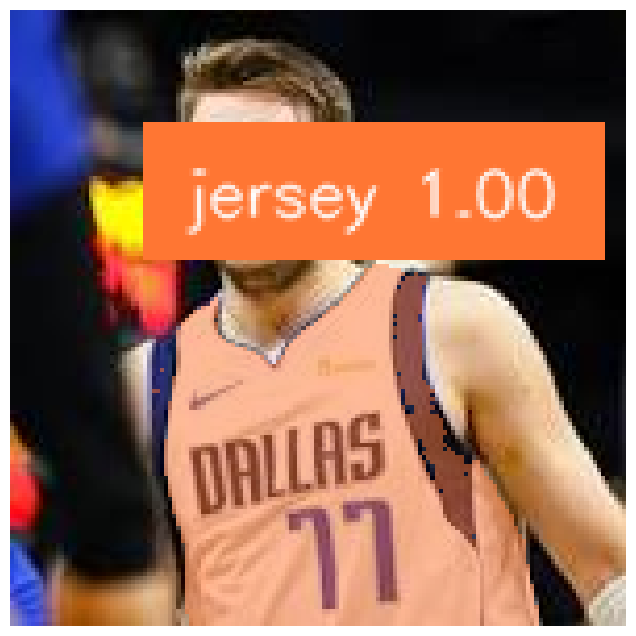

In [ ]:
from autodistill_grounded_sam_2 import GroundedSAM2
from autodistill.detection import CaptionOntology
from autodistill.utils import plot
import cv2

# Define an ontology to map class names to your Grounded SAM 2 prompt
ontology = CaptionOntology(
    {
        "person": "person",
        "basketball": "basketball",
        "hoop": "hoop",
        "jersey": "jersey",
        "court lines": "court lines",
        "numbers" : "numbers",
    }
)

# Load the model with the defined ontology
base_model = GroundedSAM2(ontology=ontology)

# Run inference on a single image
results = base_model.predict("Untitled.jpg")

# Plot the results
plot(
    image=cv2.imread("Untitled.jpg"),
    classes=base_model.ontology.classes(),
    detections=results
)

# # Label all images in a folder called `context_images`
# base_model.label("./context_images", extension=".jpeg")
